<a href="https://colab.research.google.com/github/shaquillo/student_department_counselling/blob/main/student_department_counselling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# *Student department counselling*
### Links: 
- [Github](git@github.com:shaquillo/student_department_counselling.git)
---

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from joblib import dump, load

# Loading Data

In [2]:
data_link = '/content/drive/MyDrive/datasets/mlpc/school/final_data14.csv'

In [4]:
data = pd.read_csv(data_link)

In [5]:
data.head(20)

,Unnamed: 0,Anonymat,INF212,HUM220,MAT217,INF222,PHY223,PHY224,PHY225,MAT226,MAT227,COS211,PHY213,PHY215,PHY214,MAT216,MAT218,COS221,PHY228,MAT_INF211,PHYS211,MATH 212,PHYS221,PHYS222,MAT_INF221,PHYS111,MAT_INF121,MAT_INF111,MATH 122,DES124,PHYS121,PHYS112,LAN121,HUM210,department
0,1,298,1.80,7.850,3.05,4.10,2.6,7.35,14.81,4.45,3.65,16.0,2.95,13.72,8.58,9.7,3.80,14.0,5.00,5.54,7.43,3.38,8.70,6.18,4.06,17.39,17.25,16.25,16.82,14.5,16.17,15.89,9.00,7.20,GIND
1,2,173,5.00,7.950,10.20,10.65,7.0,8.35,5.35,12.75,8.85,15.0,4.80,5.66,9.96,9.2,7.90,14.0,11.70,7.47,4.95,3.98,10.95,9.52,5.05,4.75,8.94,9.45,12.55,6.4,7.25,11.18,10.00,9.60,GIND
2,3,195,2.00,8.175,4.05,5.00,0.6,4.15,5.70,8.65,2.80,16.0,11.75,5.36,10.23,9.0,8.15,12.0,5.50,5.03,6.58,12.65,4.65,15.45,8.25,4.67,8.63,5.09,12.08,13.0,11.33,5.10,6.25,11.05,GM
3,4,218,9.80,6.850,12.30,6.20,2.2,1.00,5.20,2.00,0.60,15.0,1.40,6.50,14.65,3.1,0.00,16.5,5.20,3.76,2.69,2.28,3.70,3.10,2.64,4.11,7.34,5.44,5.30,12.3,7.85,6.41,7.80,7.50,GIND
4,5,240,11.18,12.400,12.75,15.30,16.3,16.30,16.40,17.40,17.15,16.0,10.40,9.58,6.33,10.7,13.10,14.5,16.10,10.90,8.77,12.93,16.35,16.20,16.74,9.19,7.57,10.16,5.80,12.1,8.02,6.72,11.00,12.20,GI
5,6,252,4.20,6.500,3.90,5.65,3.5,2.70,1.00,6.70,5.40,17.0,4.35,12.90,10.61,4.7,2.80,16.0,7.90,6.46,7.84,7.40,10.70,4.59,13.79,7.20,6.70,8.96,4.90,7.4,5.73,6.22,10.25,11.90,GIND
6,7,270,6.20,11.500,15.00,14.25,9.8,6.20,11.90,12.45,15.40,16.0,6.05,13.42,11.15,7.3,7.20,14.5,13.87,5.44,1.30,3.20,4.00,5.85,7.77,8.77,5.70,9.72,11.65,13.0,10.50,8.51,8.60,12.50,GI
7,8,286,13.00,11.175,5.70,9.25,6.2,6.45,12.40,6.85,3.50,14.0,8.10,9.31,11.45,5.3,9.90,16.0,9.27,8.51,11.04,10.15,12.90,15.30,14.74,9.06,6.24,11.71,11.68,11.4,10.23,8.82,9.65,12.90,GI
8,10,290,1.90,4.900,1.85,6.55,8.2,2.66,10.20,6.90,5.10,17.0,2.60,5.16,0.62,6.1,3.60,13.5,5.20,4.30,2.79,2.73,9.20,3.93,6.15,5.91,6.06,8.01,7.55,12.0,3.32,5.55,5.40,5.80,GIND
9,11,182,1.80,10.475,9.60,12.95,13.0,9.85,9.30,12.30,11.75,14.0,5.90,11.42,8.79,13.4,9.50,15.5,8.53,4.52,5.21,3.00,13.70,5.89,5.58,16.74,7.20,15.24,17.95,11.5,15.47,12.57,9.05,11.80,GELE


In [6]:
## Removing columns of index, id, sports and language subjects

data.drop(columns=['Unnamed: 0', 'Anonymat', 'COS211', 'HUM220', 'COS221', 'LAN121', 'HUM210'], inplace=True)

# Data Exploration

In [7]:
data.describe()

,INF212,MAT217,INF222,PHY223,PHY224,PHY225,MAT226,MAT227,PHY213,PHY215,PHY214,MAT216,MAT218,PHY228,MAT_INF211,PHYS211,MATH 212,PHYS221,PHYS222,MAT_INF221,PHYS111,MAT_INF121,MAT_INF111,MATH 122,DES124,PHYS121,PHYS112
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,7.947021,9.315248,11.324113,9.117021,9.271064,10.781986,11.596809,9.335106,6.734043,9.407163,8.841418,11.097872,9.103191,10.065035,8.936028,6.879433,7.526879,12.687376,10.636950,11.483191,11.274752,10.387872,12.091986,11.619645,11.768085,11.437447,10.036312
std,4.165298,5.335166,3.765514,4.507022,4.685956,4.349439,3.957178,5.179533,3.472794,2.961894,3.400075,4.599992,4.117199,3.893086,3.933524,3.096432,4.647141,3.644420,4.467225,4.954190,4.586968,5.293922,3.884614,5.007931,3.292553,3.597670,3.393441
min,0.450000,0.000000,2.650000,0.600000,1.000000,1.000000,2.000000,0.000000,1.400000,4.780000,0.210000,1.800000,0.000000,1.400000,1.680000,1.300000,0.000000,2.500000,2.320000,2.550000,4.110000,1.710000,3.560000,1.450000,4.950000,3.300000,4.100000
25%,4.550000,4.400000,8.350000,5.600000,5.450000,7.350000,8.400000,5.050000,4.200000,6.890000,8.270000,7.300000,6.000000,7.000000,6.040000,4.300000,3.750000,10.100000,7.330000,7.470000,7.260000,5.830000,9.100000,7.300000,8.800000,8.780000,7.100000
50%,7.600000,9.750000,11.350000,8.600000,8.850000,11.150000,11.800000,9.100000,5.900000,9.310000,9.940000,10.700000,9.150000,9.270000,7.940000,6.830000,6.600000,12.900000,10.400000,11.060000,11.600000,8.700000,11.710000,11.950000,12.300000,11.220000,10.040000
75%,10.950000,13.550000,14.250000,12.800000,12.800000,14.600000,14.200000,13.850000,8.700000,11.460000,10.880000,15.200000,12.150000,13.730000,12.250000,8.610000,11.200000,15.400000,14.620000,16.500000,15.820000,15.270000,15.780000,16.750000,14.400000,14.370000,12.880000
max,17.700000,18.650000,19.650000,19.450000,19.550000,19.100000,19.650000,19.350000,16.000000,16.840000,17.270000,19.600000,18.500000,18.200000,18.790000,15.100000,17.450000,19.000000,18.800000,19.600000,19.070000,19.740000,19.050000,19.200000,18.100000,17.970000,17.540000


In [8]:
data.isna().sum()

INF212        0
MAT217        0
INF222        0
PHY223        0
PHY224        0
PHY225        0
MAT226        0
MAT227        0
PHY213        0
PHY215        0
PHY214        0
MAT216        0
MAT218        0
PHY228        0
MAT_INF211    0
PHYS211       0
MATH 212      0
PHYS221       0
PHYS222       0
MAT_INF221    0
PHYS111       0
MAT_INF121    0
MAT_INF111    0
MATH 122      0
DES124        0
PHYS121       0
PHYS112       0
department    0
dtype: int64

In [9]:
data.department.value_counts()

GI      31
GELE    28
GIND    28
GM      24
GTEL    18
GC      12
Name: department, dtype: int64

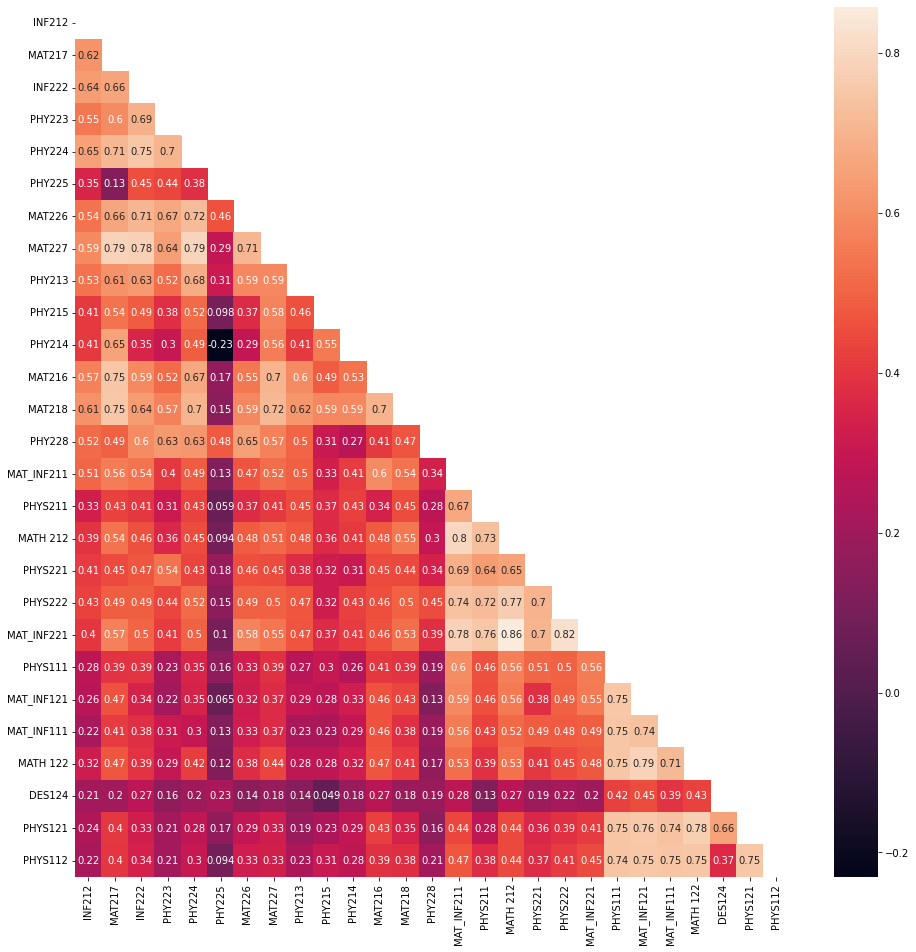

In [10]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, mask=mask, annot=True)

# Feature engineering

In [11]:
data['av_INF'] = (data['INF212'] + data['INF222'])/2
data['av_MATH'] = (data['MAT217'] +  data['MAT226'] + data['MAT227'] + data['MAT216'] + data['MAT218'] + data['MAT_INF211'] + data['MATH 212'] + data['MAT_INF221'] + data['MAT_INF121'] + data['MAT_INF111'] + data['MATH 122']) / 11
data['av_PHY'] = (data['PHY223'] +  data['PHY224'] +  data['PHY225'] +  data['PHY213'] +  data['PHY215'] +  data['PHY214'] +  data['PHY228'] +  data['PHYS211'] +  data['PHYS221'] +  data['PHYS222'] +  data['PHYS111'] +  data['DES124'] +  data['PHYS121'] +  data['PHYS112']) / 14
data['av'] = (data['av_INF'] + data['av_MATH'] + data['av_PHY']) /3